In [2]:
import rosbag
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'rosbag'

In [3]:
bag = rosbag.Bag('2024-03-07-12-44-43.bag')

X_odom = []
Y_odom = []
Z_odom = []

angle = []

for topic, msg, t in bag.read_messages(topics=['/odom']):
    print(topic, msg, t)
    X_odom.append(msg.pose.pose.position.x)
    Y_odom.append(msg.pose.pose.position.y)
    Z_odom.append(msg.pose.pose.position.z)

    new_angle = np.arcsin(2 * msg.pose.pose.orientation.z)
    angle.append(new_angle)

plt.scatter(X_odom, Y_odom, s = 1, c = 'r')
plt.show()

NameError: name 'rosbag' is not defined

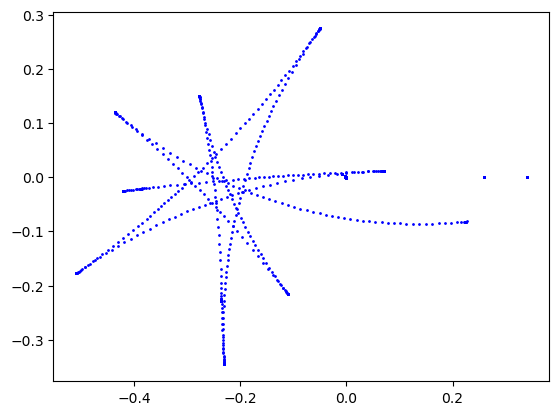

In [ ]:
X_tf = []
Y_tf = []
Z_tf = []

for topic, msg, t in bag.read_messages(topics=['/tf']):
    X_tf.append(msg.transforms[0].transform.translation.x)
    Y_tf.append(msg.transforms[0].transform.translation.y)
    Z_tf.append(msg.transforms[0].transform.translation.z)

plt.scatter(X_tf, Y_tf, s = 1, c = 'b')
plt.show()

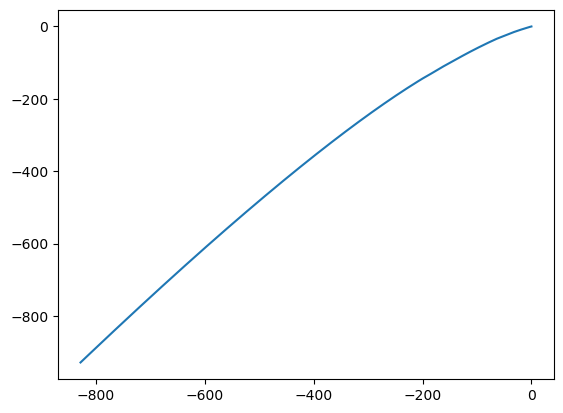

In [ ]:
X_a_imu = []
Y_a_imu = []
Z_a_imu = []

X_v_imu = [0]
Y_v_imu = [0]
Z_v_imu = [0]

X_imu = [0]
Y_imu = [0]
Z_imu = [0]

dt = 0.05 #s #123.016 / 2461

for topic, msg, t in bag.read_messages(topics=['/imu']):
    #print(msg.linear_acceleration)
    x_a = msg.linear_acceleration.x
    X_a_imu.append(x_a)
    x_v = X_v_imu[-1] + (dt * x_a)
    X_v_imu.append(x_v)
    x = X_imu[-1] + (dt * x_v)
    X_imu.append(x)

    y_a = msg.linear_acceleration.y
    Y_a_imu.append(y_a)
    y_v = Y_v_imu[-1] + (dt * y_a)
    Y_v_imu.append(y_v)
    y = Y_imu[-1] + (dt * y_v)
    Y_imu.append(y)

plt.plot(X_imu, Y_imu)